In [1]:
reference_csv = "/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_dVGFdF11_handpicked.csv"

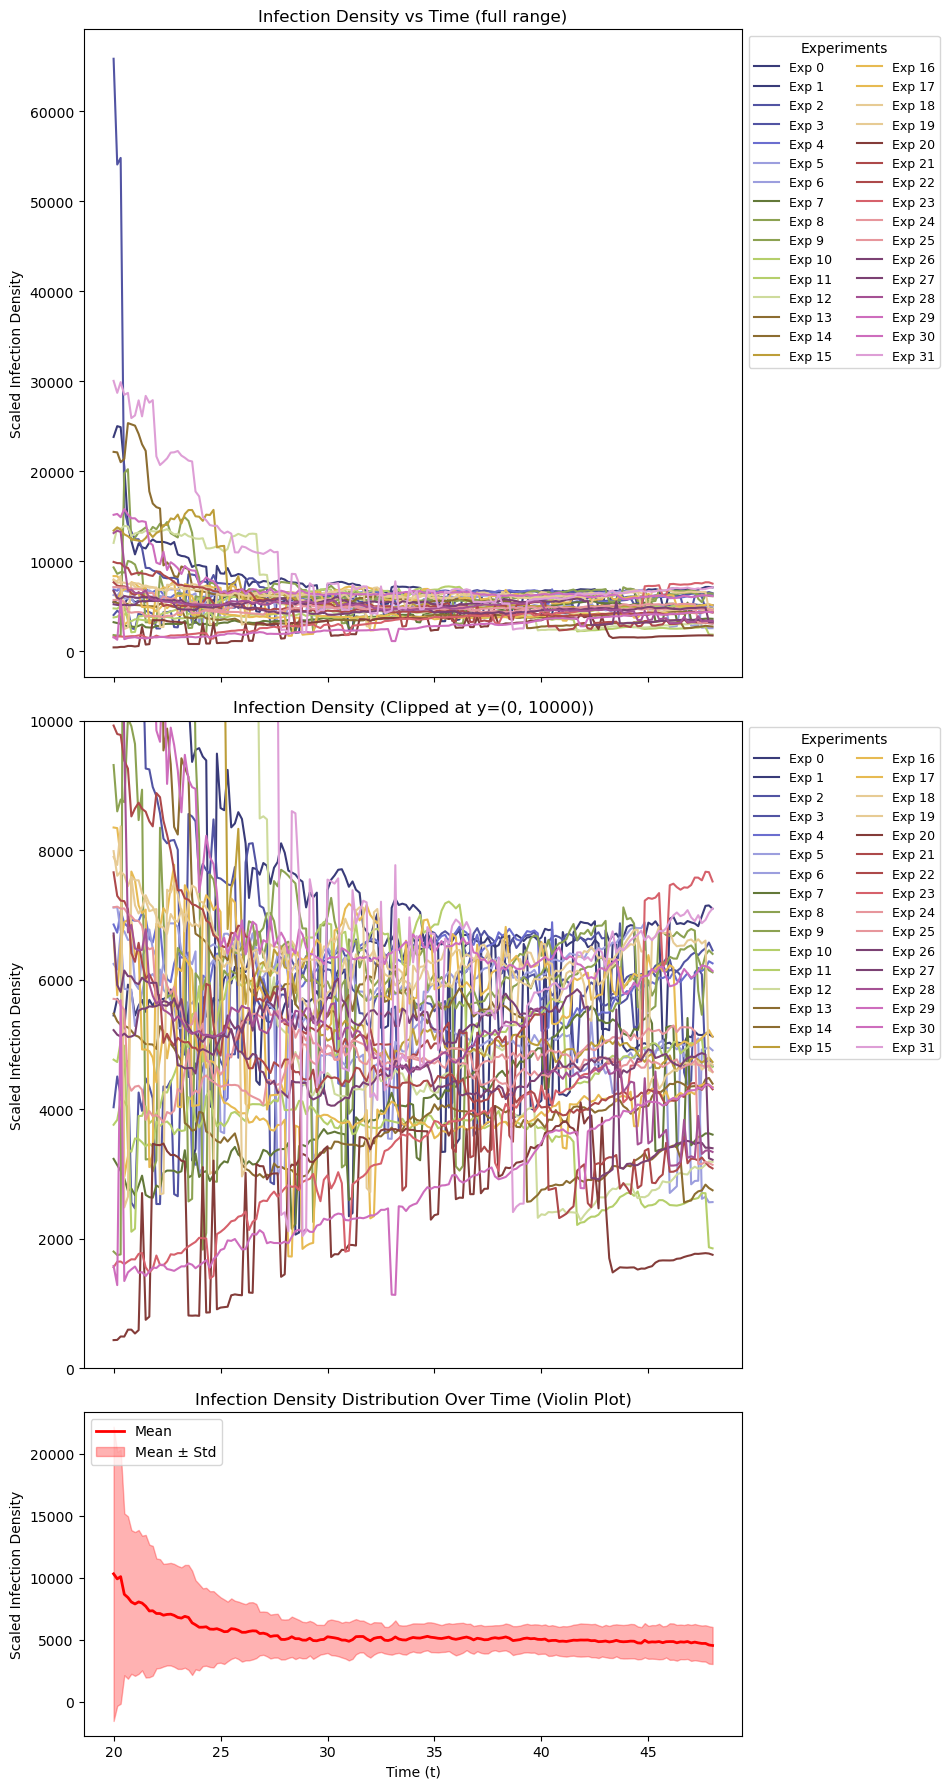

[10323.58636906  9917.45056092 10098.79300135  8671.75176107
  8412.12297864  8055.96992103  7894.32035332  8059.27250902
  7967.75068661  7711.47396866  7328.85749514  7344.46968852
  7126.77031204  7120.11673985  6985.16857599  7049.53517001
  7069.24492078  6973.06456836  6808.68485096  6751.74437031
  6894.71770488  6806.97449656  6371.74364764  6211.4113253
  6015.00291208  6018.45282777  6051.00738819  5865.03866154
  5851.38613022  5896.88350665  5791.89611696  5655.24064843
  5673.27812925  5900.01071021  5862.01118154  5768.82376647
  5606.84357692  5608.18412518  5681.38491937  5726.93082992
  5710.75550569  5506.39775766  5537.52332612  5456.77643583
  5267.1762096   5322.98975411  5333.32048269  5034.95118105
  5026.35681344  5096.27868019  5246.76685119  5091.44239328
  5091.43040809  4978.84301814  4970.7840753   5130.55486508
  4940.24503178  4922.39263499  5009.84216111  5032.78635406
  5246.51512519  5203.8055434   5159.08988612  5099.07083728
  4978.54280853  4975.172

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import ast  # To safely evaluate list strings to Python lists
import numpy as np

# Scaling factor
SCALE_FACTOR = (800 * 3.1746) ** 2

def plot_infection_density(csv_file, experiment_range=None, y_range=None):
    """
    Creates three vertically stacked plots:
    1. Full infection density plot
    2. Clipped infection density plot with a fixed y-axis range
    3. Violin plot showing the distribution (mean & std) of selected experiments at each time point

    Parameters:
    csv_file (str): Path to the CSV file.
    experiment_range (tuple or None): Tuple (start, end) specifying which experiments to show (inclusive).
                                      If None, all experiments are shown.
    y_range (tuple): Y-axis range for the second plot (default: (0, 1000)).
    """
    # Load the data
    data = pd.read_csv(csv_file)

    # Extract 't' values
    t_values = data['t']

    # Convert string representations of lists into actual lists
    inf_count_series = data['inf-count-list'].apply(ast.literal_eval)
    area_series = data['area-list(um2)'].apply(ast.literal_eval)

    # Get total number of experiments
    num_experiments = len(inf_count_series.iloc[0])  # Assuming all lists have the same length

    # Determine which experiments to plot
    if experiment_range is None:
        experiment_range = range(num_experiments)  # Default: show all experiments
    else:
        start, end = experiment_range
        experiment_range = range(start, min(end + 1, num_experiments))  # Ensure within bounds

    # Create figure with 3 subplots
    fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True, gridspec_kw={'height_ratios': [2, 2, 1]})
    
    # Generate a colormap with unique colors for selected experiments
    cmap = plt.get_cmap("tab20b")  
    colors = [cmap(i / len(experiment_range)) for i in range(len(experiment_range))]  
    
    # Storage for violin plot data (organized by time step)
    violin_data = [[] for _ in range(len(t_values))]

    # Loop through selected experiments
    for idx, exp_idx in enumerate(experiment_range):
        density_values = np.array([
            inf_count[exp_idx] / area[exp_idx] for inf_count, area in zip(inf_count_series, area_series)
        ]) * SCALE_FACTOR  # Convert to NumPy array and apply scaling

        # # Append data for violin plot (store per time step)
        # for t_idx, value in enumerate(density_values):
        #     violin_data[t_idx].append(value)  # Now, each index corresponds to a time step

        # Full Infection Density Plot
        axes[0].plot(t_values, density_values, label=f"Exp {exp_idx}", color=colors[idx], linewidth=1.5)

        # Clipped Infection Density Plot
        axes[1].plot(t_values, density_values, label=f"Exp {exp_idx}", color=colors[idx], linewidth=1.5)

        for t_idx, _ in enumerate(t_values):
            violin_data[t_idx].append(density_values[t_idx])

    # Set y-axis limits for second plot
    axes[1].set_ylim(y_range)

    # Labels and titles
    axes[0].set_title("Infection Density vs Time (full range)")
    axes[1].set_title(f"Infection Density (Clipped at y={y_range})")
    axes[2].set_title("Infection Density Distribution Over Time (Violin Plot)")

    for ax in axes[:2]:
        ax.set_ylabel("Scaled Infection Density")
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Experiments", ncol=2, fontsize=9)

    # Compute mean and standard deviation
    mean_values = np.array([np.mean(v) for v in violin_data])
    std_values = np.array([np.std(v) for v in violin_data])

    axes[2].plot(t_values, mean_values, color="red", linestyle="-", linewidth=2, label="Mean")
    axes[2].fill_between(
        t_values,
        mean_values - std_values,
        mean_values + std_values,
        color="red",
        alpha=0.3,  # Lighter shade for std deviation
        label="Mean ± Std"
    )

    # Set labels
    axes[2].set_ylabel("Scaled Infection Density")
    axes[2].set_xlabel("Time (t)")

    # Add legend
    axes[2].legend(loc="upper left", fontsize=10)

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leaves space on the right for the legends

    # Show the plot
    plt.show()

    print(mean_values)
    print(std_values)

# Example Usage:
# Show all experiments
plot_infection_density(reference_csv, y_range=(0, 10000))

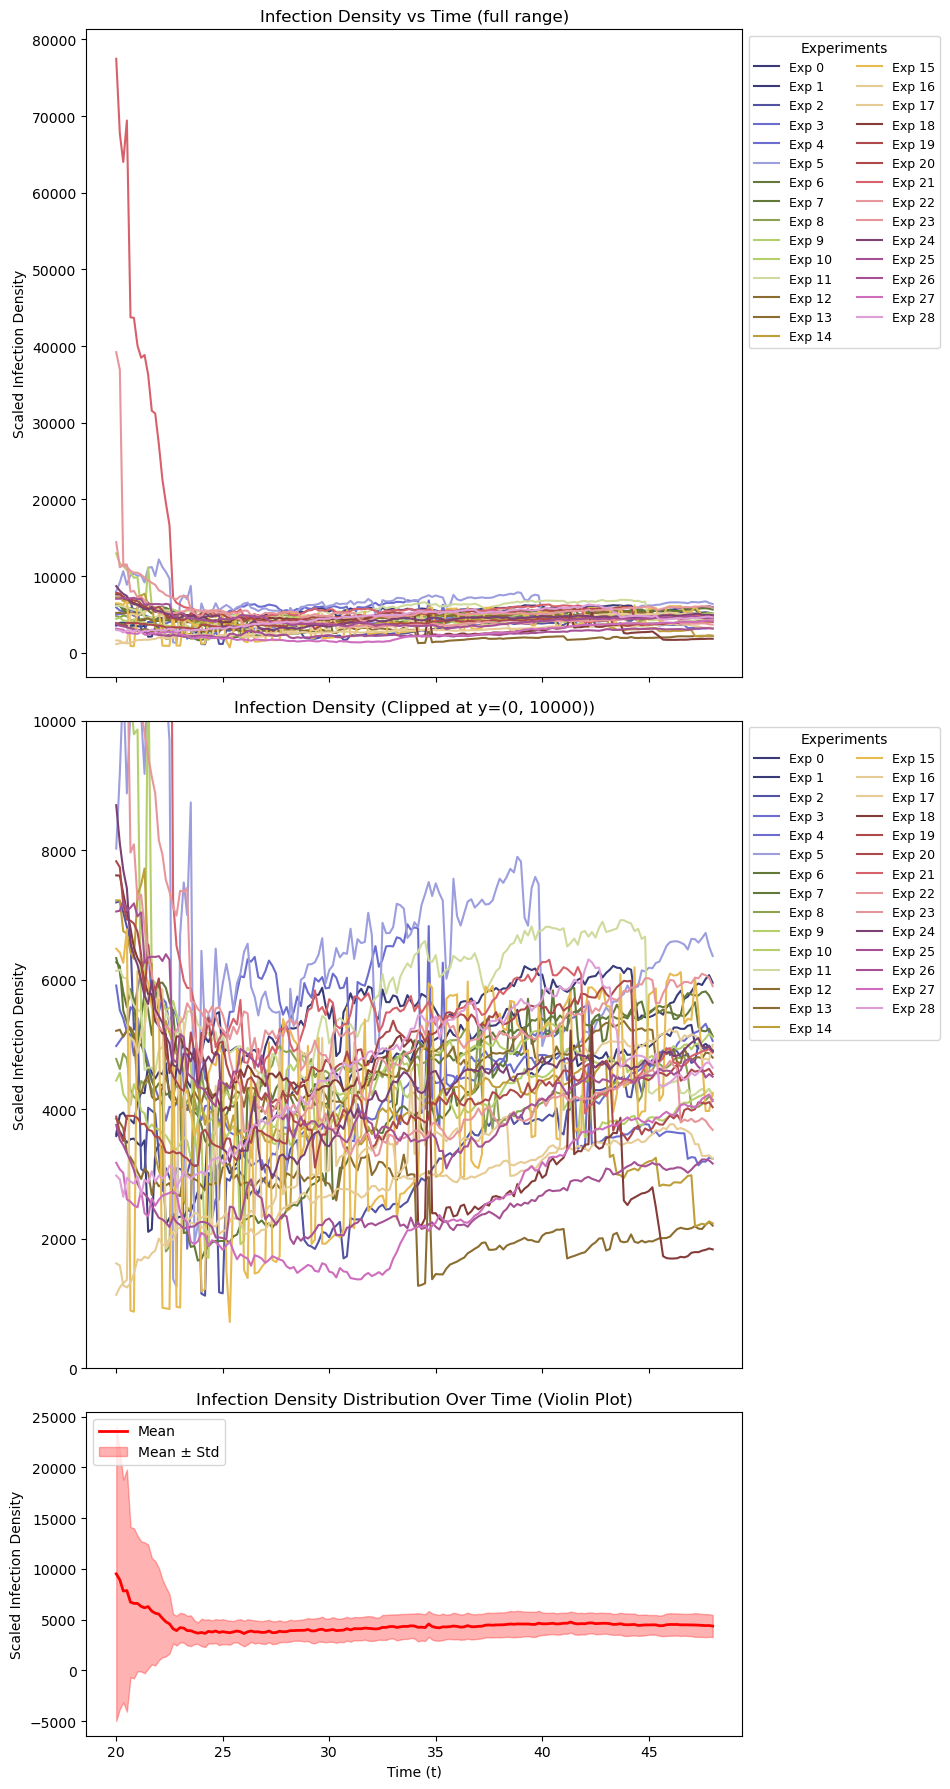

[9511.13118537 8923.78233314 7824.77952664 7865.40454813 6725.00289809
 6602.79166894 6597.91720724 6305.95099659 6170.2219039  6285.57814063
 5839.71657833 5640.85821575 5546.28295744 5126.64363622 4796.34228549
 4587.4214061  4106.63841738 3924.55193825 4216.64366534 4168.23613858
 3926.78855911 3911.20050065 3771.80859208 3671.12193519 3740.60332552
 3649.14942082 3849.47951622 3782.06335295 3884.01484167 3744.5571939
 3816.87747241 3767.64138268 3714.48323567 3804.11492814 3883.31263129
 3810.204147   3635.16816961 3803.07115551 3885.92413204 3797.18081828
 3805.04531214 3741.06511168 3760.32828388 3883.41988103 3717.82400702
 3733.54521136 3862.3781409  3808.74592172 3821.93782416 3919.75496773
 3922.07875949 3945.43295889 3952.70429067 3950.98420316 4032.58034087
 3894.26973492 3897.67971143 4013.44264607 4059.23897422 3928.5188391
 3971.07949039 4029.79086391 3922.28011923 3953.34157522 3973.46903919
 4113.57395513 3992.17648518 4115.40787318 4108.80271199 4106.25701936
 4172.75

In [32]:
plot_infection_density("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_dVGF_handpicked.csv", y_range=(0, 10000))

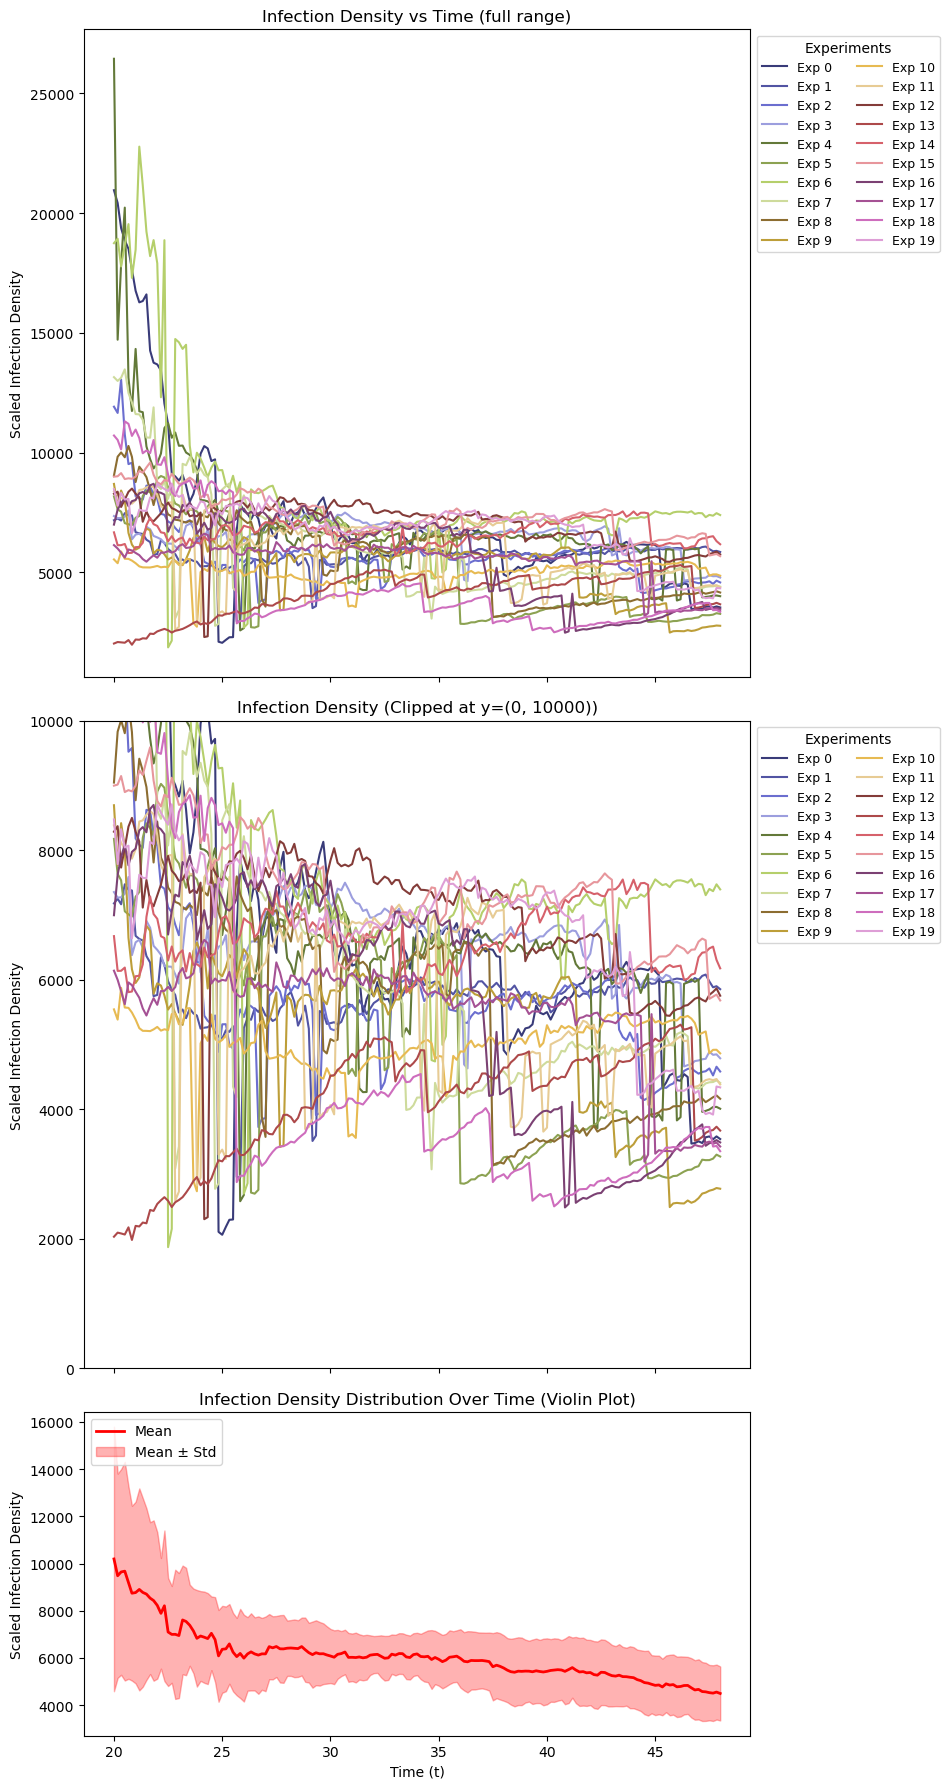

[10193.93017801  9481.8570256   9642.426235    9676.70206349
  9193.17762655  8742.24962371  8770.0789804   8902.65943304
  8776.61843039  8705.00453108  8533.8349841   8431.54268969
  8227.47968701  7888.82715682  8209.53510109  7098.63982351
  6996.99497787  7000.48563536  6948.56918424  7609.22098332
  7544.69486981  7385.22747887  7142.3768617   6831.31337188
  6928.68519448  6877.4032348   6820.02332338  7043.37147584
  6776.11440831  6086.21795972  6365.31721317  6384.88809099
  6594.78688502  6243.97351462  6055.32213029  6189.51773288
  5990.33143306  6169.40515753  6256.82182161  6169.4835917
  6119.60078176  6172.60189641  6171.48478838  6478.37917629
  6427.92927359  6483.50448232  6385.80787733  6382.92216019
  6411.56247831  6421.1100948   6407.2299515   6395.88089498
  6481.43517929  6349.18522142  6222.64106119  6140.22214809
  6219.56670456  6174.15524366  6178.25724013  6126.42289878
  6081.23354139  6029.91405784  6152.35634973  6184.62719039
  6251.00964181  6023.115

In [33]:
plot_infection_density("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_dF11_handpicked.csv", y_range=(0, 10000))

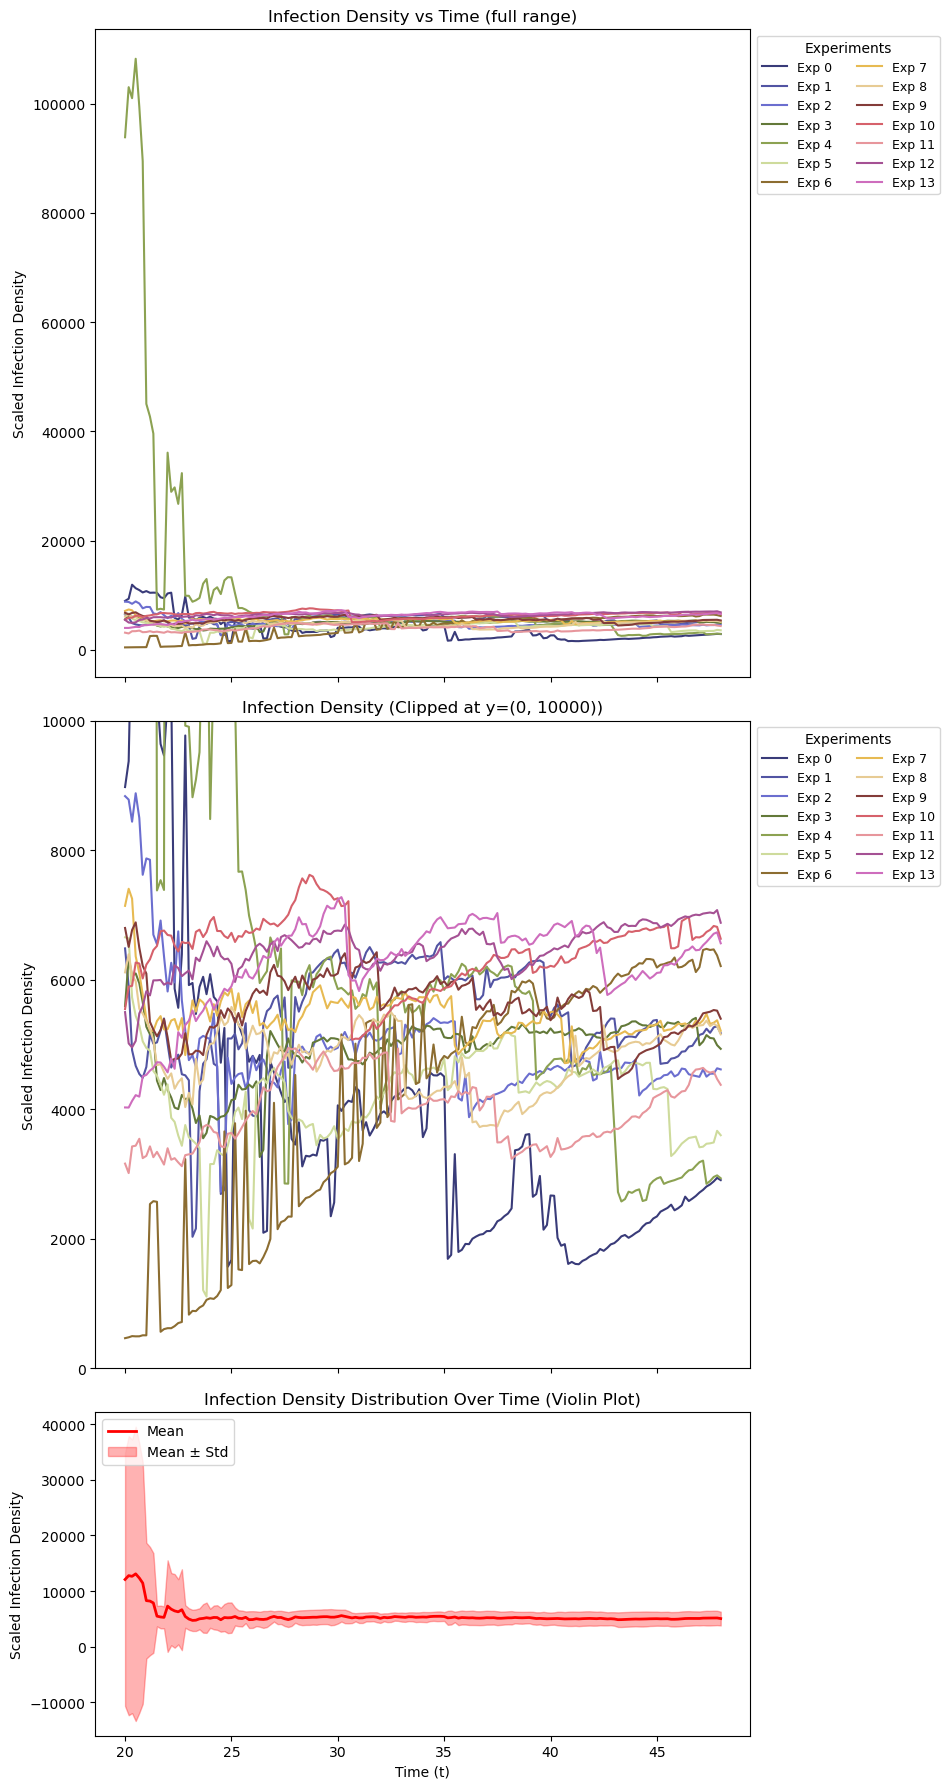

[12080.89272912 12769.19146517 12646.83793252 13091.85121382
 12338.95836799 11437.18872053  8269.32245195  8191.64932869
  7858.08243661  5477.29952405  5328.06605566  5256.51475496
  7284.82602173  6733.59451825  6421.98294354  6256.06197161
  6638.61369689  5418.80009657  4952.65956288  4711.02141132
  4751.53953268  4998.06230429  5072.68744017  5194.40042689
  5095.11228255  5242.5962095   5227.27670405  4833.17716921
  5226.79745874  5176.24233912  5210.80015177  5413.16724656
  5103.56405263  5045.52187656  5266.20729402  4848.26808027
  4864.83345581  5009.75925486  4912.41137193  4880.71278983
  4959.34704731  5236.17925251  5430.24657304  5235.60829451
  5245.77879749  5013.82115237  4858.95389346  5025.36669763
  5340.29219083  5236.21200101  5193.77104672  5231.49475814
  5249.55903185  5283.4766242   5279.96009609  5343.80730014
  5377.39412621  5378.45797037  5293.22096381  5293.77154086
  5401.55106574  5569.38527752  5429.08852103  5298.66871634
  5160.63859568  5274.59

In [40]:
plot_infection_density("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061M084M089_WR_handpicked.csv", y_range=(0, 10000))